In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot

DATA_URL = 'http://128.138.93.164/aprd6342/data/TravelPonyFacebook.csv'
df = pd.read_csv(DATA_URL)
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
# create CPI variable
df['cpi'] = df['Amount Spent (USD)'] / df['Impressions']

# create weekday variable
df['Start Date'] = pd.to_datetime(df['Start Date'], format="%Y-%m-%d")
df['weekday'] = df['Start Date'].dt.day_name()

df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),cpi,weekday
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0.000466,Monday
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0.000652,Sunday
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0.000448,Saturday
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0.000452,Friday
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0.002464,Friday


In [0]:
# which day of the week is best
df.groupby('weekday').agg({'cpi': ['mean', 'std']}).sort_values(('cpi', 'mean'))

cpi          
               mean       std
weekday                      
Saturday   0.002629  0.004405
Monday     0.002910  0.004411
Wednesday  0.002981  0.004655
Tuesday    0.003040  0.004369
Thursday   0.003398  0.005879
Sunday     0.003688  0.016115
Friday     0.004097  0.014341

(5, -0.5)

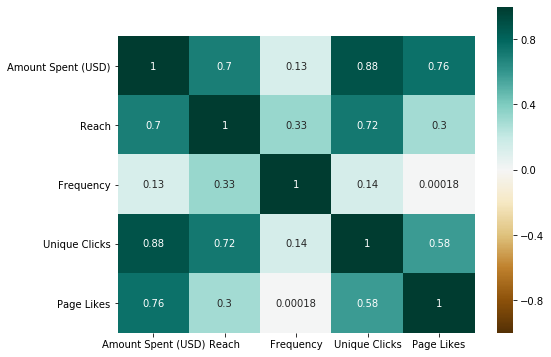

In [0]:
# correlation!
cols = ['Amount Spent (USD)', 'Reach', 'Frequency', 'Unique Clicks', 'Page Likes']
sub = df[cols]
corr = sub.corr()

fig, ax = pyplot.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="BrBG", vmin=-1, vmax=1)

# the newest version of matplot lib has some clipping issues with seaborn heatmaps (which I love dearly) 
# so I had to manually set the axes limits
ax.set_ylim(len(corr), -.5)

In [0]:
# multiple regression
dep = df['Unique Clicks']
indep = df[['Reach', 'Frequency']]

model = sm.OLS(dep, indep).fit()
predictions = model.predict(indep)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Unique Clicks   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.556
Method:                 Least Squares   F-statistic:                              2325.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):                        0.00
Time:                        03:40:40   Log-Likelihood:                         -15973.
No. Observations:                3705   AIC:                                  3.195e+04
Df Residuals:                    3703   BIC:                                  3.196e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reach          0.0019   3.12e-05     62.490      0.000       0.002       0.002
Frequency      3.6139      0.298     12.109      0.000       3.029       4.199
==============================================================================
Omnibus:                     5107.616   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5128392.747
Skew:                           7.331   Prob(JB):                         0.00
Kurtosis:                     184.674   Cond. No.                     9.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""